<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #приведем таблицу в нормальный вид
except:
    print('Ошибка. Проверьте правильность пути к данным')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [4]:
data.describe(include=[object])

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


### Вывод

Проблемы которые видны в данных:
1. Столбец 'first_day_exposition' нужно привести к формату гггг-мм-дд
2. Нулевые значения в столбце 'rooms'. Количество комнат не может быть равно 0. И тип данных нужно привести к целочисленному.
3. В столбце 'ceiling_height' странные значения высоты потолка. По санпину он не может быть ниже 2.5 м. Ну и max значение в 100м.тоже выходят за границу здравого смысла.
4. В столбце 'floors_total' максимальное значение равно 60. В то время, как  самый высокий жилой дом в СПБ 37 этажный. Скорее всего это ошибочные значенияю нужно посмотреть сколько их. Есть пропуски и нужно привести тип данных к целочисленному.
5. Странные минимальные значения в столбце living_area. Вряд ли в реальности есть квартиры с жилой площадью в 2м. Пропуски.
6. Тип данных в столбце 'is_apartment' нужно поменять на булевый. Тут самое большое количество пропуском. Скорее всего они значат, что помещение не является аппартаментами. Поэтому прелагаю заменить пропуски на False. 
7. Данные в столбце floor нужно привести к целочисленном.
8. В столбце balcony много значений nan. Буду считать, что они подразумевают отсутствие балкона и заменю их на 0. Привести тип данных к целочисленному.
9. Есть несколько пропусков в locality_name. Нужно на них посмотреть.
10. Пропуски и нулевые значения растояния до аэропорта в столбце airports_nearest. Скорее всего их нужно заменить медианными значениями. Тип даннных привести к целочисленным.
11. Сделать то же самое, что и с расстоянием до аэропота с расстоянием до центра в столбце cityCenters_nearest.
12. Заполнить пропуски и привести к целочисленным значения столбцов parks_around3000 и parks_nearest.
13. Сделать тоже самое со столбцами ponds_around3000 и ponds_nearest.
14. Заполнить медианными значениями пропуски в столбце days_exposition. Привести тип данных к целочисленному.

In [5]:
#Посмортим процент пропусков по столбцам
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


## Предобработка данных

In [6]:
# Уберем время из столбца first_day_exposition. оно нам не важно.
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [7]:
#посмотрим на уникальные значения в слолтбце 'rooms'
data['rooms'].value_counts() 

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [8]:
#Округлим значения в столбце 'days_exposition'
data['days_exposition']= round(data['days_exposition'])

In [9]:
#заполняем пропуски значений высоты потолка медианой
#ceiling_median = data['ceiling_height'].median()
#data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)

In [10]:
#Заполним пропуски в столбце 'balcony' нулями. Это некоторое допущение, что там где данные о балконах отсутствуют их в квартирах и нет.
data['balcony'].value_counts()
data['balcony'].fillna(value=0, inplace=True)
data['balcony'] = data['balcony'].astype('int')

In [11]:
#data['living_area'].value_counts()

In [12]:
# Приводим значение цены к целочисленным
data['last_price'] = data['last_price'] / 1000
data['last_price'] = data['last_price'].astype('int')

In [13]:
# Меняем пропуски в столбце 'is_apartment' на False. Так же как и с балконами считаем, что если данных нет, то квартира не является аппартаментами.
data['is_apartment'] = data['is_apartment'].fillna(False)

In [14]:
# Исправим проблему с разным написанием 'поселок' и 'посёлок' в столбце 'locality_name'
data['locality_name'] = data['locality_name'].replace(to_replace='ё', value='е', regex=True)

<div class="alert alert-info"> <b>Комментарий студента:</b>ё на е поменял. Спасибо!</div>

In [15]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,3350,40.40,2018-12-04,1,nan,11.00,18.60,1,False,False,False,11.00,2,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,5196,56.00,2015-08-20,2,nan,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,64900,159.00,2015-07-24,3,nan,14.00,nan,9,False,False,False,nan,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,10000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,2890,30.40,2018-09-10,1,nan,12.00,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,3700,37.30,2017-11-02,1,nan,26.00,10.60,6,False,False,False,14.40,1,поселок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,7915,71.60,2019-04-18,2,nan,24.00,nan,22,False,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,2900,33.16,2018-05-23,1,nan,27.00,15.43,26,False,False,False,8.81,0,поселок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,5400,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [16]:
#Посчитаем количество пропусков данных расстояния до центра
data['cityCenters_nearest'].isna().sum()

5519

In [17]:
data['airports_nearest'].isna().sum()

5542

<font size="3">Остальсь ещё довольно большое количесто пропусков в данных о расстояние до центра и аэропорта. Но эти данные мы не можем заполнять средними или медианными значениями т.к это исказит реальную картину. Так что будем использовать их как есть.</font>

## Расчёты и добавление результатов в таблицу

In [18]:
#Расчитаем стоимость квадратного метра. Для это разделим стоимость квартир на общую площадь
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [19]:
# Добавим столбец дня недели 
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name() 
# Добавим столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
# Добавим столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

In [20]:
# Создадим функцию, которая разобьёт этажи на три категории(первый, последний, другой)
def floors_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [21]:
# Создадим столбец с категориями этажей методом apply
data['floors_cat'] = data.apply(floors_cat, axis = 1)

In [22]:
# Создадим столбец в котором будут храниться данные сообношения жилой площади к общей
data['living_area_ratio'] = data['living_area'] / data['total_area']

In [23]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [24]:
# Проверим все ли необходимые столбцы добавлены
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floors_cat,living_area_ratio,kitchen_area_ratio
0,20,13000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,120.37,Thursday,March,2019,другой,0.47,0.23
1,7,3350,40.40,2018-12-04,1,nan,11.00,18.60,1,False,False,False,11.00,2,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00,82.92,Tuesday,December,2018,первый,0.46,0.27
2,10,5196,56.00,2015-08-20,2,nan,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,92.79,Thursday,August,2015,другой,0.61,0.15
3,0,64900,159.00,2015-07-24,3,nan,14.00,nan,9,False,False,False,nan,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,408.18,Friday,July,2015,другой,nan,nan
4,2,10000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,100.00,Tuesday,June,2018,другой,0.32,0.41
5,10,2890,30.40,2018-09-10,1,nan,12.00,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,nan,nan,nan,nan,nan,nan,55.00,95.07,Monday,September,2018,другой,0.47,0.30
6,6,3700,37.30,2017-11-02,1,nan,26.00,10.60,6,False,False,False,14.40,1,поселок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00,99.20,Thursday,November,2017,другой,0.28,0.39
7,5,7915,71.60,2019-04-18,2,nan,24.00,nan,22,False,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan,110.54,Thursday,April,2019,другой,nan,0.26
8,20,2900,33.16,2018-05-23,1,nan,27.00,15.43,26,False,False,False,8.81,0,поселок Мурино,nan,nan,nan,nan,nan,nan,189.00,87.45,Wednesday,May,2018,другой,0.47,0.27
9,18,5400,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00,88.52,Sunday,February,2017,другой,0.71,0.11


## Исследовательский анализ данных

<font size="3"> Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.</font>

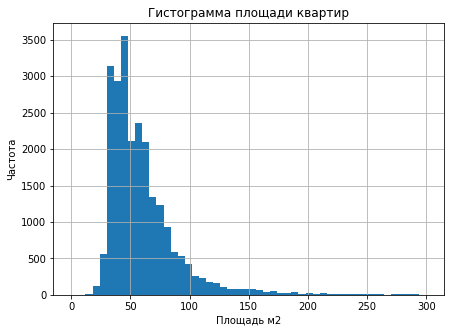

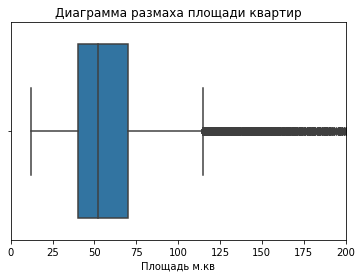

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

In [25]:
# Строим гистаграмму для площади
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0,300), legend=None)
plt.title('Гистограмма площади квартир')
plt.xlabel('Площадь м2')
plt.ylabel('Частота')
plt.show()
sns.boxplot(data['total_area'])
plt.title('Диаграмма размаха площади квартир')
plt.xlabel('Площадь м.кв')
plt.xlim(0, 200)
plt.show()
data['total_area'].describe()

In [26]:
IQR = 70 - 40  
Burn = 70 + 1.5 * IQR
Burn

115.0

Вывод: Площадь квартир лежит в диапазоне  от 12м до 900м. Средняя площадь в выборке около 60м.

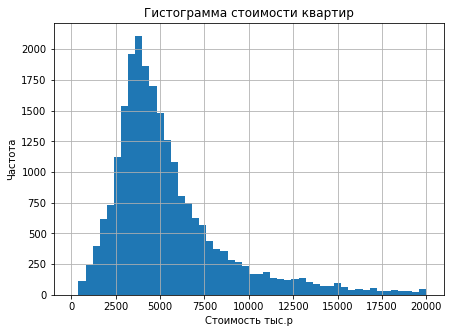

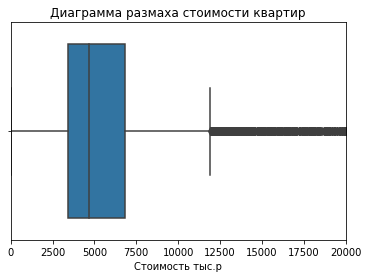

count    23,699.00
mean      6,541.53
std      10,887.01
min          12.00
25%       3,400.00
50%       4,650.00
75%       6,800.00
max     763,000.00
Name: last_price, dtype: float64

In [27]:
# Строим гистаграмму для стоимости квартир
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0, 20000), legend=None)
plt.title('Гистограмма стоимости квартир')
plt.xlabel('Стоимость тыс.р')
plt.ylabel('Частота')
plt.show()
sns.boxplot(data['last_price'])
plt.title('Диаграмма размаха стоимости квартир')
plt.xlabel('Стоимость тыс.р')
plt.xlim(0, 20000)
plt.show()
data['last_price'].describe()

In [28]:
IQR = 6.8 - 3.4  
Burn = 6.8 + 1.5 * IQR
Burn

11.899999999999999

Вывод: Средняя стоимость квартир в выборке около 6,5млн.р. Есть значение вызывающие сомнения в их доставерности. Например цена в 12190р. никак не может соответствовать стоимости квартиры.

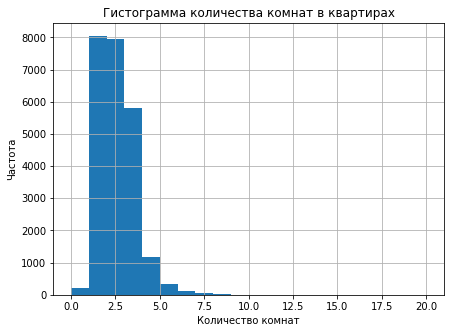

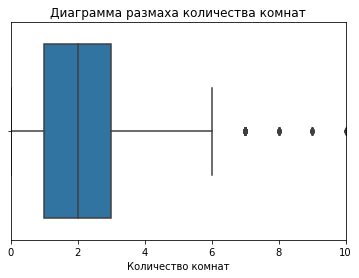

count   23,699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

In [29]:
# Строим гистаграмму для количества комнат
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (7,5), range = (0,20), legend=None)
plt.title('Гистограмма количества комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()
sns.boxplot(data['rooms'])
plt.title('Диаграмма размаха количества комнат')
plt.xlabel('Количество комнат')
plt.xlim(0, 10)
plt.show()
data['rooms'].describe()

In [30]:
IQR = 3 - 1  
Burn = 3 + 1.5 * IQR
Burn

6.0

Вывод: Среднее количество комнат в выборке около 2. Больше всего однокомнатных квартир. Есть, скорее всего, ошибочные значения, например количество комнат равное 0.

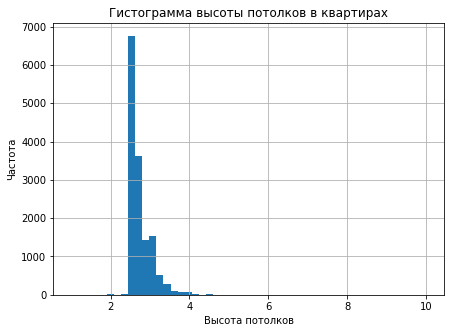

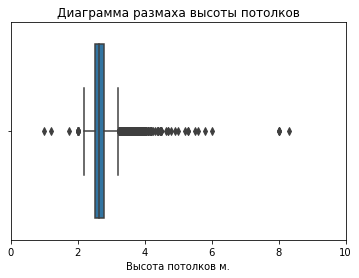

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

In [31]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (1, 10), legend=None)
plt.title('Гистограмма высоты потолков в квартирах')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()
sns.boxplot(data['ceiling_height'])
plt.title('Диаграмма размаха высоты потолков')
plt.xlabel('Высота потолков м.')
plt.xlim(0, 10)
plt.show()
data['ceiling_height'].describe()

In [32]:
IQR = 2.8 - 1  
Burn = 2.8 + 1.5 * IQR
Burn

5.5

Вывод: Среднее высота потолка около 2,7м. Больше всего однокомнатных квартир. Есть ошибочные значения, например высота потолка до 2,5м(не может быть в жилых помещениях) и более 5,5м.

<font size="3">Общий вывод: Типичная квартира в выборке: двухкомнатная, площадью около 60м, ценой 6.5млн.р с высотой пололка около 2,7м.</font>

<font size="3">Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</font>

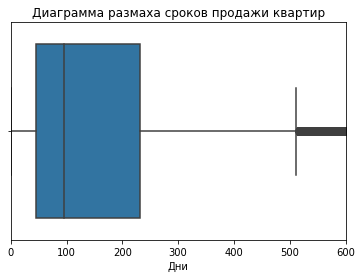

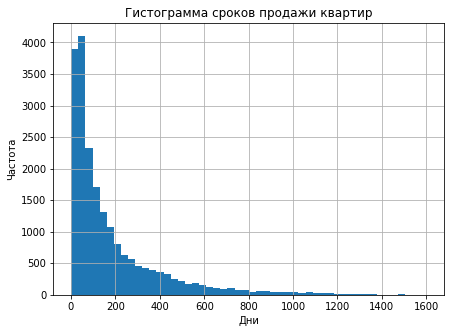

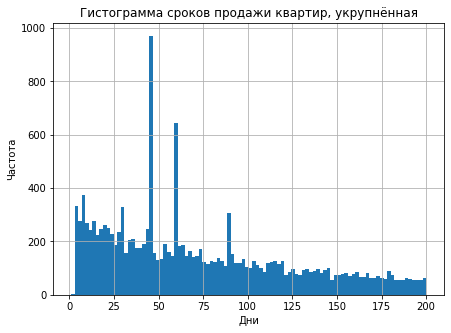

In [33]:
plt.ylim(1,1500)
sns.boxplot(data['days_exposition'])
plt.title('Диаграмма размаха сроков продажи квартир')
plt.xlabel('Дни')
plt.xlim(0, 600)
plt.show()
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (1, 1600), legend=None)
plt.title('Гистограмма сроков продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Частота')
plt.show()
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (1, 200), legend=None)
plt.title('Гистограмма сроков продажи квартир, укрупнённая')
plt.xlabel('Дни')
plt.ylabel('Частота')
plt.show()

На гистограмме видно несколько пиков, частота которых сильно отличается от остальной выборки. Значения этих пиков можно посмотреть с помощью функции value_counts()

In [34]:
data['days_exposition'].describe()

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

<font size="3">Вывод: Среднее время продажи квартиры около 180 дней, медиана 95. Времена продажи можно предварительно разделить на три категории, по значениям квартилей: быстрая продажа-до 45 дней, нормальная от 45 до 232 дней, медленная - более 232 дней.</font>

In [35]:
#очистим данные от аномльных значений
good_data = data.copy().query('1<= rooms<= 12 and 2.5<=ceiling_height<=5.5 and 1000<=last_price<=20000')
#посмотрим на очищенные данные
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,living_area_ratio,kitchen_area_ratio
count,"13,751.00","13,751.00","13,751.00","13,751.00","13,751.00","13,742.00","13,033.00","13,751.00","12,960.00","13,751.00","10,952.00","10,966.00","10,967.00","4,894.00","10,967.00","5,320.00","11,489.00","13,751.00","13,751.00","13,033.00","12,960.00"
mean,10.27,"5,695.70",58.22,2.09,2.71,10.25,33.73,5.63,10.12,0.68,"28,912.74","14,399.97",0.61,479.10,0.74,527.12,187.27,97.24,"2,017.52",0.57,0.18
std,5.57,"3,281.24",25.23,0.99,0.25,6.21,17.19,4.62,4.87,1.01,"12,797.52","8,741.02",0.80,318.03,0.93,279.82,225.96,31.98,1.02,0.10,0.07
min,0.00,"1,000.00",12.00,1.00,2.50,1.00,2.00,1.00,1.30,0.00,0.00,208.00,0.00,3.00,0.00,16.00,1.00,13.48,"2,014.00",0.04,0.05
25%,6.00,"3,572.50",41.00,1.00,2.50,5.00,19.00,2.00,7.00,0.00,"18,397.50","9,721.00",0.00,287.00,0.00,299.75,45.00,78.16,"2,017.00",0.50,0.13
50%,10.00,"4,800.00",52.60,2.00,2.65,9.00,30.30,4.00,9.00,0.00,"26,884.50","13,165.50",0.00,455.00,0.00,516.00,101.00,95.84,"2,018.00",0.57,0.17
75%,14.00,"6,800.00",69.20,3.00,2.80,14.00,42.70,8.00,11.50,1.00,"37,407.00","16,167.00",1.00,604.00,1.00,744.00,241.00,114.33,"2,018.00",0.64,0.23
max,50.00,"20,000.00",460.80,11.00,5.30,60.00,279.60,30.00,64.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00",392.35,"2,019.00",0.98,0.72


<font size="3">Какие факторы больше всего влияют на стоимость квартиры? 
Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
Также изучите зависимость от даты размещения: дня недели, месяца и года.</font>

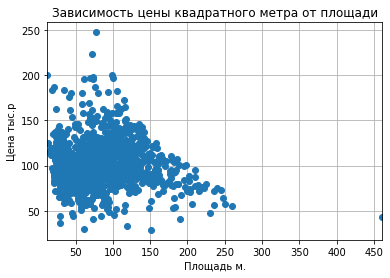

In [36]:
#Создадим сводную таблицу зависимости цены квадратного метра от площади
total_area_pivot_table = good_data.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
#Уберем двухэтажные названия столбцов 
total_area_pivot_table.columns = ['median', 'count']
#Построим диаграмму рассеивания медианных значений
total_area_pivot_table.plot(y = 'median', style = 'o', grid = True, legend=None)#Создадим сводную таблицу зависимости цены квадратного метра от площади
plt.title('Зависимость цены квадратного метра от площади')
plt.xlabel('Площадь м.')
plt.ylabel('Цена тыс.р')
plt.show()

In [37]:
#Посчитаем коэффициент корреляции
good_data['total_area'].corr(good_data['price_per_square_meter'])

0.04295736892077817

Зависимость между ценой квадратного метра и площадью не очень выражена. Но в целом чем больше площадь квартиры, тем меньше стоимость квадратного метра в ней.

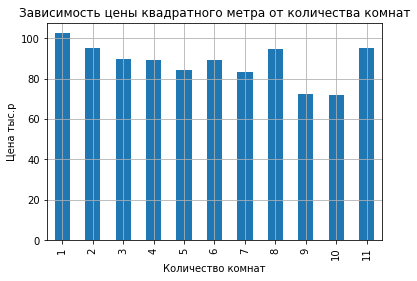

In [38]:
#Определим зависимость цены от количества комнат. 
total_rooms_pivot_table = good_data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
#Уберем двухэтажные названия столбцов 
total_rooms_pivot_table.columns = ['median', 'count']
#Построим диаграмму рассеивания медианных значений
total_rooms_pivot_table.plot(y = 'median', kind = 'bar', grid = True, legend=None)#Создадим сводную таблицу зависимости цены квадратного метра от площади
plt.title('Зависимость цены квадратного метра от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена тыс.р')
plt.show()

In [39]:
#Посчитаем коэффициент корреляции
good_data['rooms'].corr(good_data['price_per_square_meter'])

-0.1382539489925177

Стоимость квадратного метра зависит от количества комнат. В целом, чем больше комнат в квартире, тем меньше цена квадратного метра. Самые дорогим кв.м в однокомнатных квартирах. 

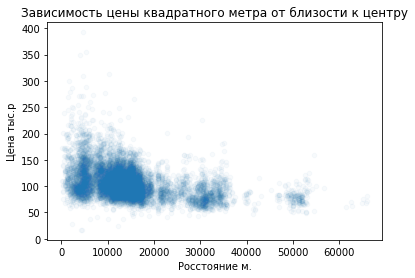

In [40]:
#Зависимость цены от близости к центру.
good_data.plot(y = 'price_per_square_meter', x = 'cityCenters_nearest', kind = 'scatter', alpha=0.03)
plt.title('Зависимость цены квадратного метра от близости к центру')
plt.xlabel('Росстояние м.')
plt.ylabel('Цена тыс.р')
plt.show()

In [41]:
#Посчитаем коэффициент корреляции
good_data['cityCenters_nearest'].corr(good_data['price_per_square_meter'])

-0.38289166850643225

Очевидно, что чем ближе к центру, тем выше стоимость квартир. 

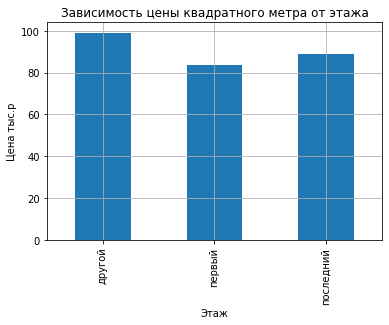

In [42]:
#Создадим сводную таблицу зависимости площади от цены квадратного метра
floors_cat_pivot_table = good_data.pivot_table(index = 'floors_cat', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
#Уберем двухэтажные названия столбцов 
floors_cat_pivot_table.columns = ['median', 'count']
#Построим диаграмму рассеивания медианных значений
floors_cat_pivot_table.plot(y = 'median', kind = 'bar', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена тыс.р')
plt.show()

Cтоимость квадратного метра на первом и последнем этажах в среднем немного ниже, чем на всех остальных. 

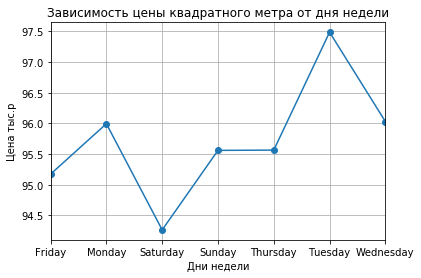

In [43]:
#Изучим зависимость цены квадратного метра от даты размещения: дня недели.
pivot_table_weekday = good_data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
pivot_table_weekday.columns = ['median', 'count']
pivot_table_weekday.plot(y = 'median', style = '-o', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от дня недели')
plt.xlabel('Дни недели')
plt.ylabel('Цена тыс.р')
plt.show()

Cтоимость выставленных на продажу квартир выше всего в середине недели(во вторник и среду). А к концу недели стоимость снижается. Возможно это связано с тем, что общая активность людей в середине недели выше. И возможно, люды выставляющие квартиры в середине неделе, подходят к этому более основательно и проводят некий анализ схожих объявлений и на этом основание выставляют более высокую цену. В выходные же люди ведут себя более расслабленно и возможно не утруждают себя анализом похожих объявлений и выставляют цену боллее импульсивно. 

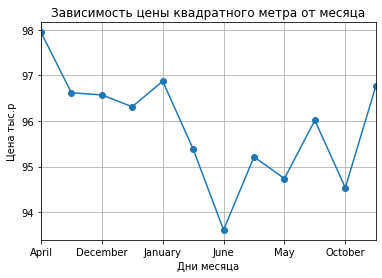

In [44]:
#Изучим зависимость цены квадратного метра от даты размещения: месяц.
pivot_table_month = good_data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
pivot_table_month.columns = ['median', 'count']
pivot_table_month.plot(y = 'median', style = '-o', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от месяца')
plt.xlabel('Дни месяца')
plt.ylabel('Цена тыс.р')
plt.show()

Стоимость квартир не однородна в течение года. Максимальных значений она достигает в апреле, минимальных в июне. Видно, что летом стоимось квартир, в среднем, ниже, чем в другие времена года. Возможно это всязано с сезоном отпусков и снижением активности покупателей. Возможно, чтобы продать квартиру летом, продавцы вынуждены давать скидки потенциальным покупателям.

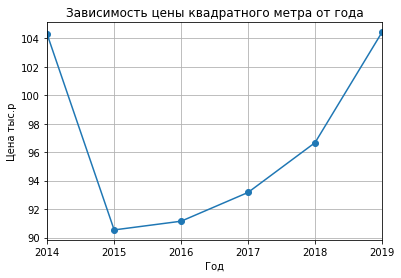

In [45]:
#Изучим зависимость цены квадратного метра от даты размещения: год.
pivot_table_year = good_data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
pivot_table_year.columns = ['median', 'count']
pivot_table_year.plot(y = 'median', style = '-o', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от года')
plt.xlabel('Год')
plt.ylabel('Цена тыс.р')
plt.show()

In [46]:
#Посчитаем коэффициент корреляции
good_data['year_exposition'].corr(good_data['price_per_square_meter'])

0.08101067589286857

На графике хорошо видно, что стоимость квартир падала с 2014 по 2015г. Потом два года была более ли менее стабильна, А в 2017г цены на недвижимость начали рости. Этот рост скорее всего связан с появление программ льготной ипотеки. И если бы у нас были данные за 2020-21гг, то мы бы увидели, что рост этот очень существенен.

<font size="3">Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах.</font>

In [47]:
#Создадим сводную таблицу с данными о количестве объявлений и средней цены квадратного метра по населенным пунктам
locality_pivot_table = good_data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['median', 'count'])
locality_pivot_table.columns = ['median', 'count']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,median,count
locality_name,,
Санкт-Петербург,104.17,9527
Всеволожск,65.69,267
Пушкин,99.74,225
поселок Шушары,77.66,216
поселок Мурино,85.71,210
Колпино,74.73,202
Гатчина,68.98,148
Петергоф,81.99,143
поселок Парголово,91.15,136


Определим населённый пункт с самой высокой средней стоимостью жилья.

In [48]:
locality_pivot_table[locality_pivot_table['median']==locality_pivot_table['median'].max()]

,median,count
locality_name,,
Санкт-Петербург,104.17,9527


Определим населённый пункт с самой низкой средней стоимостью жилья.

In [49]:
locality_pivot_table[locality_pivot_table['median']==locality_pivot_table['median'].min()]

,median,count
locality_name,,
Всеволожск,65.69,267


Самая высокая средняя стоимость квадратного метра жилья в Санкт-Петербурге, самая низкая в Всеволожске.

<font size="3">Выясняем какая область входит в центр</font>

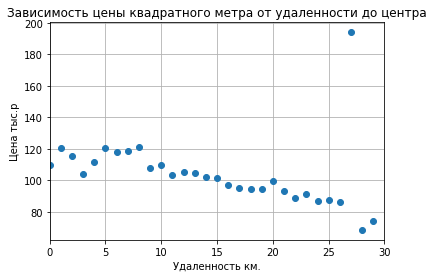

In [50]:
#Создадим столбец расстояния до центра в километрах
good_data['cityCenters_nearest_km'] = round(good_data['cityCenters_nearest'] / 1000)
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].astype('int', errors='ignore')
#Выберем те данные, где нит пропусков
good_data.loc[(good_data['locality_name'] == 'Санкт-Петербург') & (good_data['cityCenters_nearest_km'].notna()), 'cityCenters_nearest_km'].apply(round)
spb_data = good_data.query('locality_name == "Санкт-Петербург"')
#Создадим сводную таблицу зависимости цены квадратного метра от расстояния
spb_center_nearest = spb_data.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc='median')
spb_center_nearest.head(10)
spb_center_nearest.plot(xlim=(0, 30), style='o', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от удаленности до центра')
plt.xlabel('Удаленность км.')
plt.ylabel('Цена тыс.р')
plt.show()

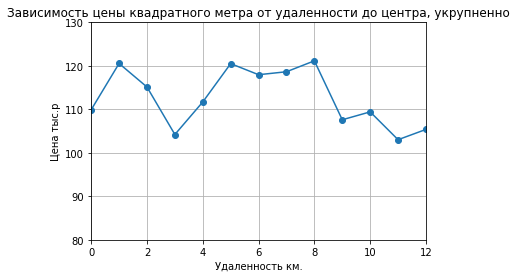

In [51]:
spb_center_nearest.plot(xlim=(0, 12), ylim=(80, 130), style='-o', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от удаленности до центра, укрупненно')
plt.xlabel('Удаленность км.')
plt.ylabel('Цена тыс.р')
plt.show()

Скорее всего центром города можно считать радиус в 8км. Именно после этого расстояния происходит самый большой спад средней цены квадратного метра.

<font size="3">Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.</font>

In [52]:
#Определям квартире которые находятся на расстояние до 8км от центра
spb_data_center = spb_data.query('cityCenters_nearest_km <= 8')

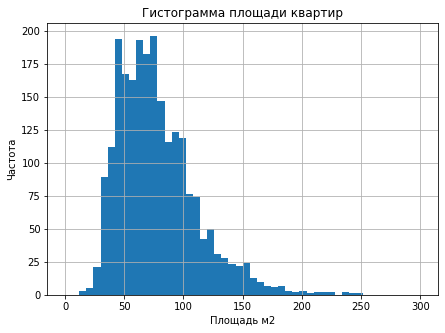

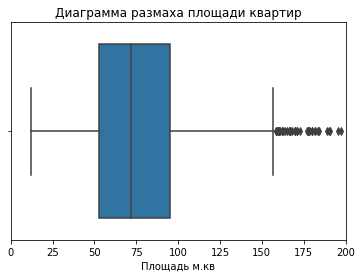

count   2,262.00
mean       77.30
std        33.24
min        12.00
25%        53.00
50%        72.00
75%        95.00
max       248.00
Name: total_area, dtype: float64

In [53]:
#Площадь квартир в центре
spb_data_center.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0,300), legend=None)
plt.title('Гистограмма площади квартир')
plt.xlabel('Площадь м2')
plt.ylabel('Частота')
plt.show()
sns.boxplot(spb_data_center['total_area'])
plt.title('Диаграмма размаха площади квартир')
plt.xlabel('Площадь м.кв')
plt.xlim(0, 200)
plt.show()
spb_data_center['total_area'].describe()

Квартиры в центре в среднем больше по площади, чем квартиры в других районах.

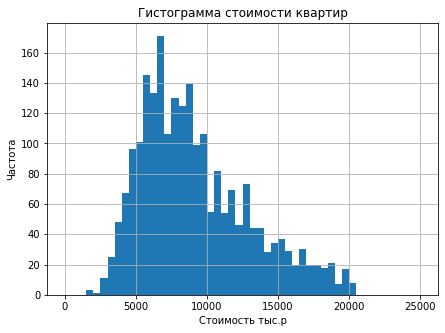

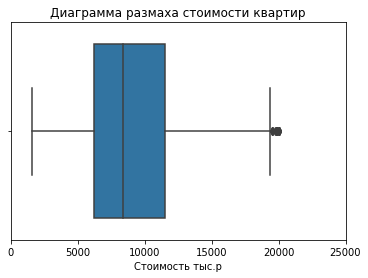

count    2,262.00
mean     9,119.22
std      3,831.07
min      1,600.00
25%      6,250.00
50%      8,350.00
75%     11,496.00
max     20,000.00
Name: last_price, dtype: float64

In [54]:
#стоимость квартир в центре
spb_data_center.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0, 25000), legend=None)
plt.title('Гистограмма стоимости квартир')
plt.xlabel('Стоимость тыс.р')
plt.ylabel('Частота')
plt.show()
sns.boxplot(spb_data_center['last_price'])
plt.title('Диаграмма размаха стоимости квартир')
plt.xlabel('Стоимость тыс.р')
plt.xlim(0, 25000)
plt.show()
spb_data_center['last_price'].describe()

Ожидаемо квартиры в центре дороже, чем в других районах. Средняя цена 9млн рублей, против 6.5млн по всей выборке. 

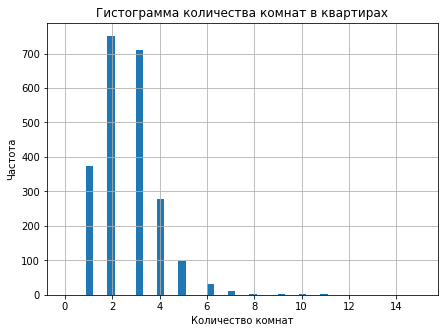

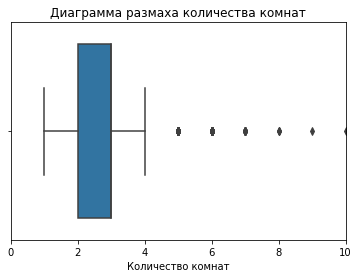

count   2,262.00
mean        2.62
std         1.21
min         1.00
25%         2.00
50%         3.00
75%         3.00
max        11.00
Name: rooms, dtype: float64

In [55]:
# Строим гистаграмму для количества комнат
spb_data_center.plot(y = 'rooms', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (0,15), legend=None)
plt.title('Гистограмма количества комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()
sns.boxplot(spb_data_center['rooms'])
plt.title('Диаграмма размаха количества комнат')
plt.xlabel('Количество комнат')
plt.xlim(0, 10)
plt.show()
spb_data_center['rooms'].describe()

В среднем количество комнат в квартирах в центре не сильно отличается то среднего количества комнат в квартирах по всей выборке.

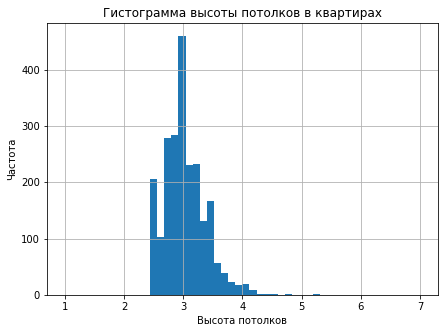

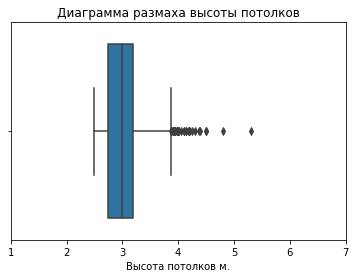

count   2,262.00
mean        3.03
std         0.35
min         2.50
25%         2.75
50%         3.00
75%         3.20
max         5.30
Name: ceiling_height, dtype: float64

In [56]:
#Высота потолков в центре
spb_data_center.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (7,5), range = (1, 7), legend=None)
plt.title('Гистограмма высоты потолков в квартирах')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()
sns.boxplot(spb_data_center['ceiling_height'])
plt.title('Диаграмма размаха высоты потолков')
plt.xlabel('Высота потолков м.')
plt.xlim(1, 7)
plt.show()
spb_data_center['ceiling_height'].describe()

Потолки в центре выше. Средняя высота 3м.

<font size="3">Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).</font>

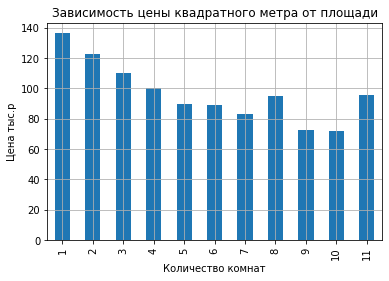

In [57]:
#Зависимость цены квадратного метра в центре от количества комнат
spb_rooms_pivot_table = spb_data_center.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
#Уберем двухэтажные названия столбцов 
spb_rooms_pivot_table.columns = ['median', 'count']
#Построим диаграмму рассеивания медианных значений
spb_rooms_pivot_table.plot(y = 'median', kind = 'bar', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от площади')
plt.xlabel('Количество комнат')
plt.ylabel('Цена тыс.р')
plt.show()

In [58]:
spb_data_center['rooms'].corr(spb_data_center['price_per_square_meter'])

-0.39446721182461053

Чем меньше комнат в квартире, тем выше стоимость квадратного метра. И эта тенденция в центре города выражена ярче, чем в остальных районах.

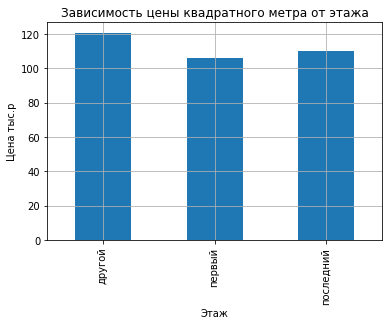

In [59]:
#Зависимость цены от этажа
floors_spb_cat_pivot_table = spb_data_center.pivot_table(index = 'floors_cat', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
#Уберем двухэтажные названия столбцов 
floors_spb_cat_pivot_table.columns = ['median', 'count']
#Построим диаграмму рассеивания медианных значений
floors_spb_cat_pivot_table.plot(y = 'median', kind = 'bar', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена тыс.р')
plt.show()

Зависимость цены от этажа в центре примерно такая же как и во всей выборке. На первом этаже квартиры дешевле. 

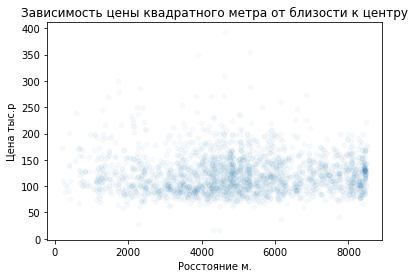

In [60]:
#зависимость от расстояния до центра
#Зависимость цены от близости к центру.
spb_data_center.plot(y = 'price_per_square_meter', x = 'cityCenters_nearest', kind = 'scatter', alpha=0.03)
plt.title('Зависимость цены квадратного метра от близости к центру')
plt.xlabel('Росстояние м.')
plt.ylabel('Цена тыс.р')
plt.show()

In [61]:
spb_data_center['cityCenters_nearest'].corr(spb_data_center['price_per_square_meter'])

0.0072007809668797875

Зависимость цены от расстояния до центра не выражена. Т.к. квартиры в выборке и так, по факту, все находятся в центре города. Скорее в данном случае на цену влияет конкретный район, например на Крестовском острове квартиры гораздо дороже, чем на лиговском проспекте, хотя расстояние до центра примерно одинаковое.

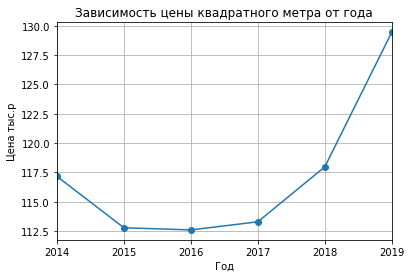

In [62]:
#Зависимость цены квадратного метра в центре от года
pivot_table_year_center = spb_data_center.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['median', 'count'])
pivot_table_year_center.columns = ['median', 'count']
pivot_table_year_center.plot(y = 'median', style = '-o', grid = True, legend=None)
plt.title('Зависимость цены квадратного метра от года')
plt.xlabel('Год')
plt.ylabel('Цена тыс.р')
plt.show()

In [63]:
spb_data_center['year_exposition'].corr(spb_data_center['price_per_square_meter'])

0.09167552009269814

Цены на квартиры в центре в 2014 году снижались не так существенно, как в других районах.

## Общий вывод

<font size="3">В ходе исследовования объявлений о продаже квартир с Санкт-петербурге и Ленинградской области были выявлены параметры, которые влияют на стоимость квартир. Также были определены значения, которые можно считать аномальными.
Параметры:
1. Общая площадь(аномальные значения: больше 115кв.м). Хотя в реальности квартиры большей площади тоже существуют.
2. Число комнат. В целом, чем меньше в квартире комнат, тем больше стоит квадратный метр в ней. 
3. Этаж. Возможно в форме стоит предусматреть отдельную графу, в которой можно будет выбрать категорию этажа(первый/последний/другой) Т.к. этот параметр довольно сильно влияет на цену. Квартиры на первом этаже дешевле остальных.
4. Расстояние до центра города. Было установлено, что в Санкт-Петербурге центром условно можно считать окружность радиусов в 8км. И в этой области параметры квартир несколько отличаются от всей выборки. Они Дороже, больше по площади, в них выше пололки. 
Возможно нужно предусмотреть некий фильтр, который отделяет центр от остальной выборке. Т.к. значения которые могут считаться аномальными для остальной выбоке не являются таковыми для центра.
5. Высота потолков. Возможно нужно изначально ввести ограничения на ввод некорректных данных. Например не разрешать указывать высоту потолка ниже 2.5 и выше 6м. Тогда аномалий, связанных с ручным вводом заведомо неверных данных станет меньше. 
</font>